## HT6 - Proyecto 2. Entrega 4
### KNN
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import regression
#Importar Datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
house_prices=pd.read_csv("train.csv")

## Modelo de Regresión KNN

In [2]:
X = regression.drop_many_nulls(house_prices).dropna()
X["SalePrice"] = np.log(X["SalePrice"])
y = X.pop("SalePrice")

In [3]:
X_trainR, X_testR,y_trainR, y_testR = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_trainR.shape)
print(X_testR.shape)
print(y_trainR.shape)
print(y_testR.shape)

(770, 57)
(330, 57)
(770,)
(330,)


In [4]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Crear pipeline con KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Definir hiperparámetros a optimizar en la búsqueda
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}

# Validación cruzada con 5 folds y GridSearch
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_trainR, y_trainR)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'E...
                                                                          'TotalBsmtSF',
                                                                          '1stFlrSF',
                                                                          'GrLivArea',
                                                                          'BsmtFullBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [7]:
best_knn = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")

Mejor hiperparámetro: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'distance'}


In [8]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Evaluación en el conjunto de prueba
y_predR = best_knn.predict(X_testR)
rmse = root_mean_squared_error(y_testR, y_predR)
r2 = r2_score(y_testR, y_predR)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

RMSE en test: 0.15674900350326598
R² en test: 0.8437972360280762


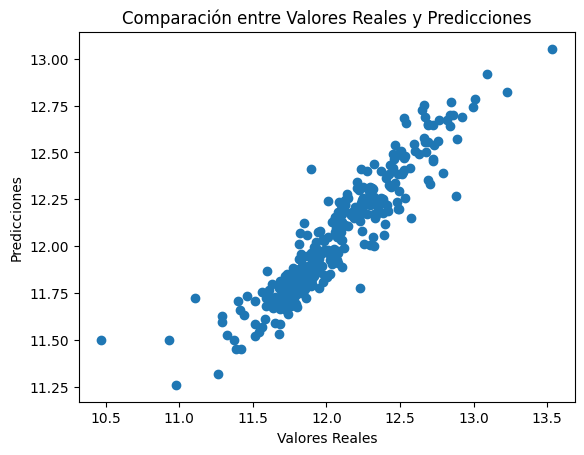

In [9]:
plt.scatter(y_testR, y_predR)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

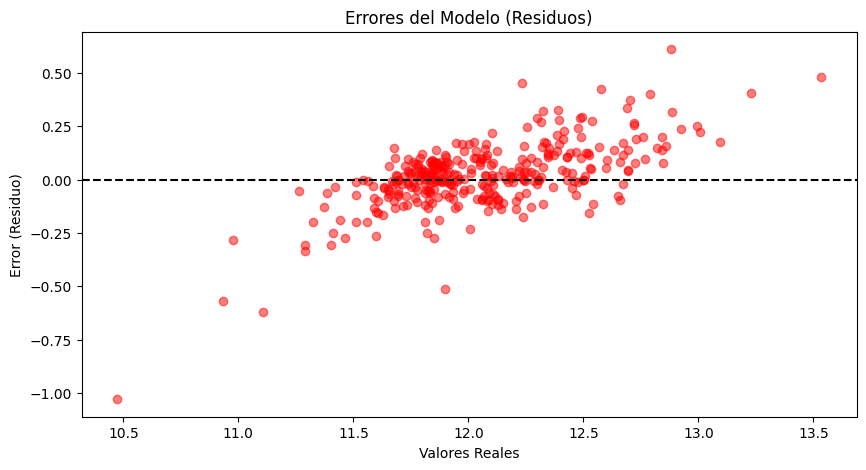

In [10]:
plt.figure(figsize=(10,5))
residuals = y_testR - y_predR
plt.scatter(y_testR, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Error (Residuo)")
plt.title("Errores del Modelo (Residuos)")
plt.show()

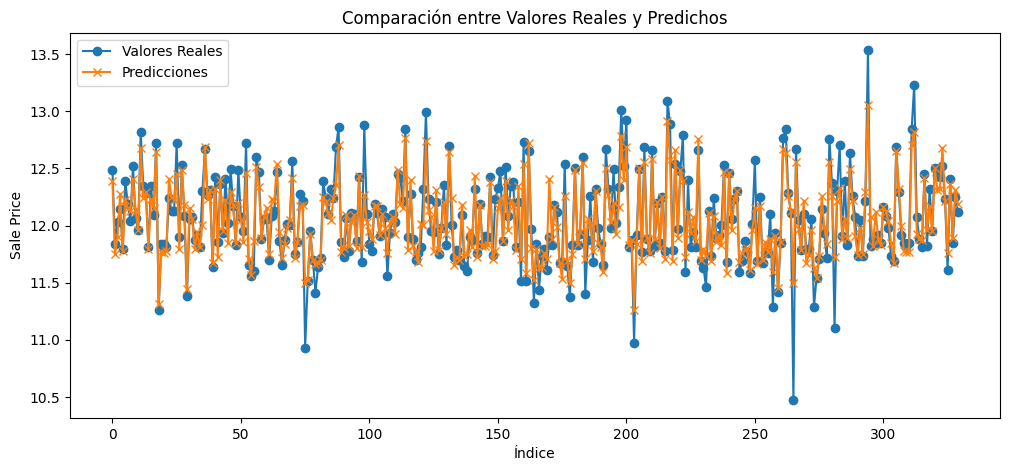

In [11]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_testR)), y_testR.values, label="Valores Reales", marker='o')
plt.plot(range(len(y_predR)), y_predR, label="Predicciones", marker='x')
plt.xlabel("Índice")
plt.ylabel("Sale Price")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

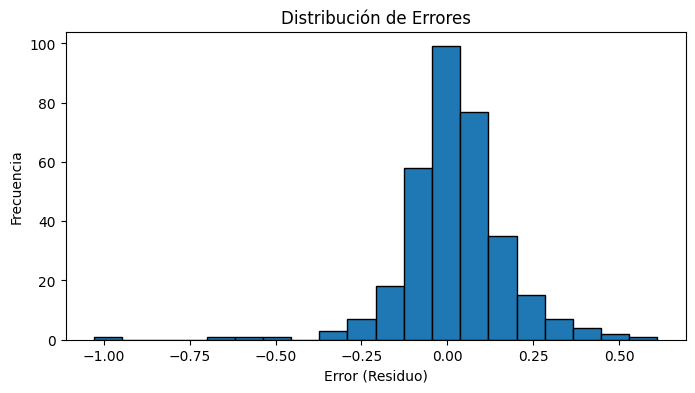

In [12]:
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()

## Modelo de Clasificación KNN

In [28]:
import classification
data_clean = classification.trans_categorical(house_prices)
data_knnC = classification.sale_price_replace(
    regression.drop_many_nulls(data_clean)
)
data_knnC = data_knnC.dropna()
print(data_knnC.dtypes) 




MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
ExterQual          int64
Foundation         int32
BsmtQual         float64
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinType2       int32
TotalBsmtSF        int64
Heating            int32
HeatingQC          int64
CentralAir         int32
Electrical         int32
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64


c:\Users\diego\OneDrive\Escritorio\2025\Semestre VII\Mineria\KNN\classification.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


In [29]:
y_knnC = data_knnC.pop('SpThird')

X_knnC = data_knnC
X_trainC, X_testC, y_trainC, y_testC = train_test_split(
    X_knnC, y_knnC, test_size=0.3, train_size=0.7, random_state=42
)
print(X_trainC.shape)
print(X_testC.shape)
print(y_trainC.shape)
print(y_testC.shape)

(788, 57)
(339, 57)
(788,)
(339,)


In [22]:
scaler = StandardScaler()
X_trainC = scaler.fit_transform(X_trainC)
X_testC = scaler.transform(X_testC)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_trainC, y_trainC)
    scores = cross_val_score(knn, X_trainC, y_trainC, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    y_pred = knn.predict(X_testC)
    accuracies.append(accuracy_score(y_testC, y_pred))

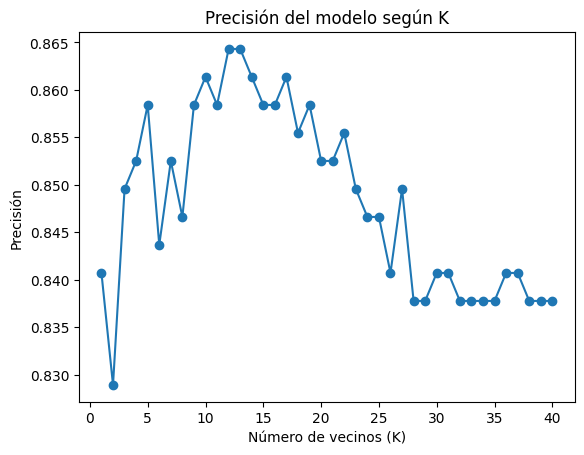

In [24]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo según K')
plt.show()

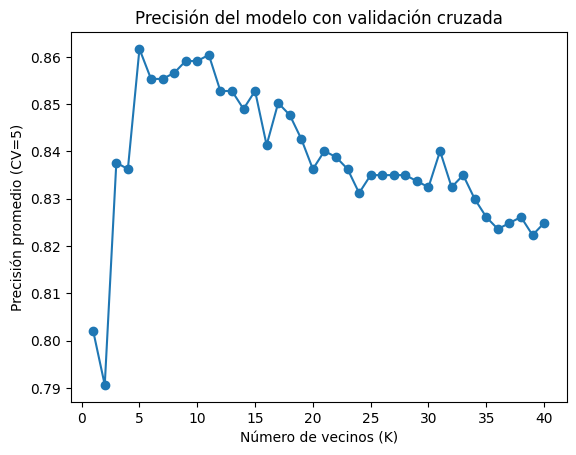

Mejor valor de K según CV=5: 5


In [25]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión promedio (CV=5)')
plt.title('Precisión del modelo con validación cruzada')
plt.show()

# Mejor K basado en la validación cruzada
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K según CV=5: {best_k}")